# Function Transformer

Function Transformer takes your original data and applies a custom function to modify it in a desired way. This function can perform various operations such as scaling, encoding, imputing missing values, or creating new features. The transformed data can then be used to train a machine learning model.

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as  plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
df.sample(5)

,Survived,Age,Fare
332,0,38.0,153.4625
81,1,29.0,9.5000
772,0,57.0,10.5000
867,0,31.0,50.4958
187,1,45.0,26.5500


In [6]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=0)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10672\829771255.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


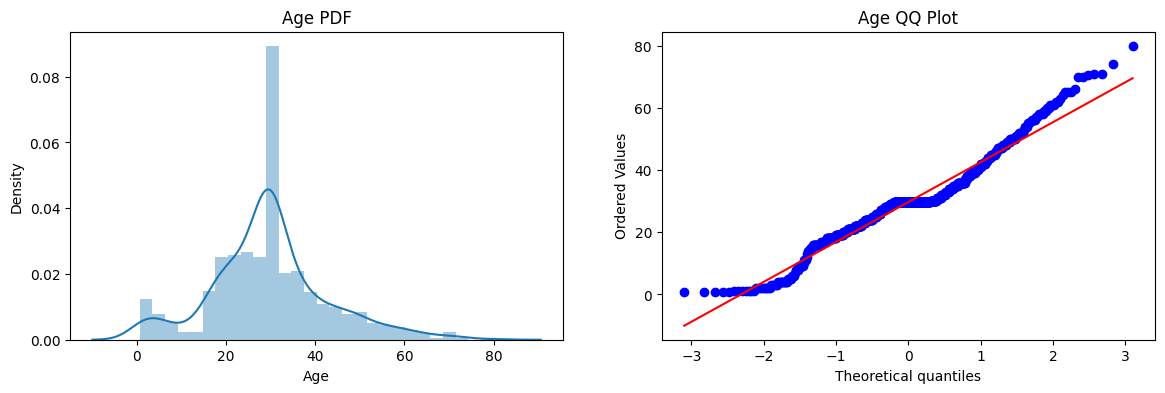

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10672\553510704.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


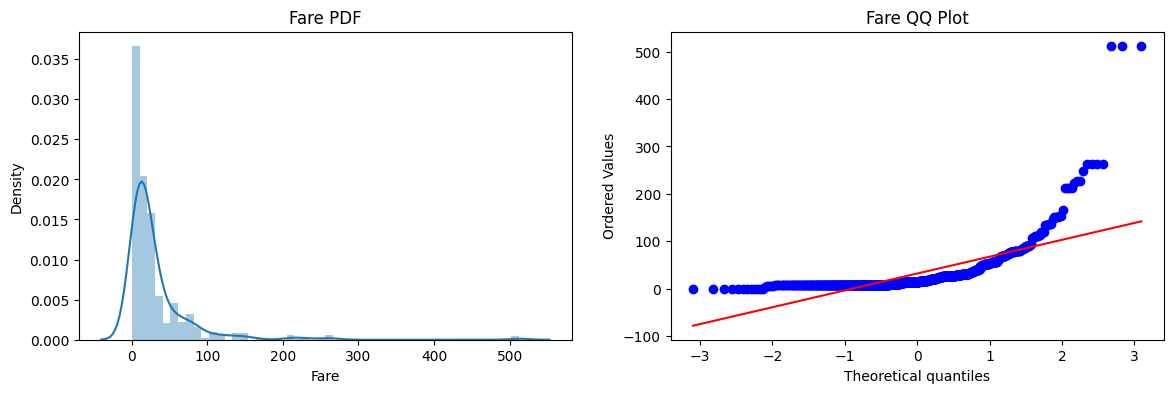

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [10]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print('Accuracy :', accuracy_score(y_test, y_pred))
print('Accuracy1 :', accuracy_score(y_test, y_pred1))

Accuracy : 0.6983240223463687
Accuracy1 : 0.6871508379888268


In [12]:
trf = FunctionTransformer(func = np.log1p)

In [13]:
x_train_transformer = trf.fit_transform(x_train)
x_test_transformer = trf.transform(x_test)

In [14]:
clf.fit(x_train_transformer, y_train)
clf2.fit(x_train_transformer, y_train)

y_pred = clf.predict(x_test_transformer)
y_pred1 = clf2.predict(x_test_transformer)

print('Accuracy :', accuracy_score(y_test, y_pred))
print('Accuracy1 :', accuracy_score(y_test, y_pred1))

Accuracy : 0.7039106145251397
Accuracy1 : 0.6759776536312849
